In [5]:
import numpy as np
import os  # Import the os library for file path operations

# Define common directory path
common_path = 'your_path_here'

# Load files using common directory path
SMART_x = np.loadtxt(os.path.join(common_path, 'Uncorrected_MedianFiltered_SIZEMatched_SMART_x.csv'), delimiter=',')
SMART_y = np.loadtxt(os.path.join(common_path, 'Uncorrected_MedianFiltered_SIZEMatched_SMART_y.csv'), delimiter=',')
SMART_sample = np.loadtxt(os.path.join(common_path, 'Uncorrected_MedianFiltered_SIZEMatched_SMART_sampleID.csv'), delimiter=',')
SMART_centre = np.loadtxt(os.path.join(common_path, 'Uncorrected_MedianFiltered_SIZEMatched_SMART_centre.csv'), delimiter=',')
SMART_patient = np.loadtxt(os.path.join(common_path, 'Uncorrected_MedianFiltered_SIZEMatched_SMART_patientID.csv'), delimiter=',')
SMART_wn = np.loadtxt(os.path.join(common_path, 'Uncorrected_MedianFiltered_SIZEMatched_SMART_wn.csv'), delimiter=',')
SMART_uniquemapID = np.loadtxt(os.path.join(common_path, 'Uncorrected_MedianFiltered_SIZEMatched_SMART_mapID.csv'), delimiter=',')
SMART_x = SMART_x.T

# Create dictionary keys

Raw_labels = {
  "NSQ": 0,
  "IM": 1,
  "LGD": 2,
  "HGD": 3,
  "AC": 4  
}

Centre = {
  "Centre_1": 0,
  "Centre_2": 1,
  "Centre_3": 2
}


SMART_x.shape, SMART_y.shape, SMART_sample.shape, SMART_centre.shape, SMART_patient.shape, SMART_wn.shape, SMART_uniquemapID.shape


((560819, 891), (560819,), (560819,), (560819,), (560819,), (891,), (560819,))

In [6]:
def truncate_spectra_to_region(wn, spectra, trunc_start = 400, trunc_end = 1800):
    """
    Function to truncate spectra within a specified region, default to the fingerprint region
    Inputs:
        wn - an array (vector) of the wavenumbers
        spectra - an array (matrix) of spectra (spectra in the rows)
        trunc_start - start of wavenumber region to be included
        trunc_end - end of wavenumber region to be included
    Outputs:
        
    """

    if trunc_start > trunc_end:
        print("ERROR: Start of region must be lower than end of region")
        pass
    
    closest_top_wn = min(wn, key=lambda x:abs(x-trunc_end))
    closest_bottom_wn = min(wn, key=lambda x:abs(x-trunc_start))

    max_wn = np.where(wn == closest_top_wn)
    min_wn = np.where(wn == closest_bottom_wn)

    trunc_spectra = spectra[:,np.squeeze(max_wn):np.squeeze(min_wn)]
    trunc_wn = wn[np.squeeze(max_wn):np.squeeze(min_wn)]
    
    return trunc_spectra, trunc_wn

In [7]:
def MapandSpectraCount(raw_y, uniqueID, labels):
    """
    Function which counts the number of individual maps and spectra present in each label class
    
    Inputs:
        raw_y - a vector of integer labels
        uniqueID - a vector denoting unique ID
        labels - a dictionary of the labels to be used
    
    Outputs:
        MapCount - a vector giving the count maps per of labels 
        SpectraCount - a vector giving the count spectra per of labels 
    
    """

    number_of_labels = len(labels)
    
    MapCount = np.zeros(number_of_labels)
    SpectraCount = np.zeros(number_of_labels)
    
    for i in range(number_of_labels):
        MapCount[i] = len(np.unique(uniqueID[raw_y == i]))
        SpectraCount[i] = len(uniqueID[raw_y == i])

       

    return MapCount, SpectraCount

In [8]:
SMART_x, SMART_wn = truncate_spectra_to_region(SMART_wn, SMART_x, trunc_start = 452, trunc_end = 1800)
SMART_x.shape, SMART_wn.shape

((560819, 676), (676,))

In [9]:
patient_count, spectra_count = MapandSpectraCount(SMART_y, SMART_patient, Raw_labels)

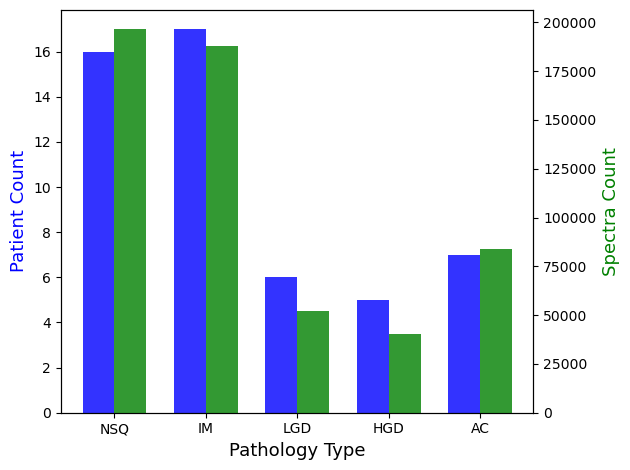

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Raw_labels = {
  "NSQ": 0,
  "IM": 1,
  "LGD": 2,
  "HGD": 3,
  "AC": 4  
}


"""Create bar chart of combined patient count and spectra count"""

import matplotlib.pyplot as plt
import numpy as np


# Create plot
fig, ax = plt.subplots()
index = np.arange(len(Raw_labels))
bar_width = 0.35
opacity = 0.8

ax.bar(index, patient_count, bar_width,
alpha=opacity,
color='b',
label='Patient Count')

ax2=ax.twinx()
ax2.bar(index + bar_width, spectra_count, bar_width,
alpha=opacity,
color='g',
label='Spectra Count')

ax.set_xlabel('Pathology Type', fontsize = 13)
ax.set_ylabel('Patient Count', color='b', fontsize = 13)
ax2.set_ylabel('Spectra Count', color='g', fontsize = 13)
#ax.set_title('Patient Count vs Spectra Count')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Raw_labels)
#ax.legend()
#ax2.legend()

plt.tight_layout()
plt.show()

In [11]:
NSQ_Spectra = np.zeros( [np.sum(SMART_y == 0) , SMART_x.shape[1] ] )
IM_Spectra = np.zeros( [np.sum(SMART_y == 1) , SMART_x.shape[1] ] )
LGD_Spectra = np.zeros( [np.sum(SMART_y == 2) , SMART_x.shape[1] ] )
HGD_Spectra = np.zeros( [np.sum(SMART_y == 3) , SMART_x.shape[1] ] )
AC_Spectra = np.zeros( [np.sum(SMART_y == 4) , SMART_x.shape[1] ] )

l =0
k =0
m = 0
n = 0
p = 0

for i in range (0, len(np.squeeze(SMART_y))):
    if np.squeeze (SMART_y)[i] == 0:
        NSQ_Spectra[l][:]= np.array(SMART_x[i])
        l += 1
    elif np.squeeze(SMART_y)[i] == 1:
        IM_Spectra[k][:] = np.array(SMART_x[i])
        k += 1
    elif np.squeeze(SMART_y)[i] == 2:
        LGD_Spectra[m][:] = np.array(SMART_x[i])
        m += 1
    elif np.squeeze(SMART_y)[i] == 3:
        HGD_Spectra[n][:] = np.array(SMART_x[i])
        n += 1
    elif np.squeeze(SMART_y)[i] == 4:
        AC_Spectra[p][:] = np.array(SMART_x[i])
        p += 1
        
NSQ_AveSpectra = np.mean(NSQ_Spectra, axis=0)
IM_AveSpectra = np.mean(IM_Spectra, axis=0) 
LGD_AveSpectra = np.mean(LGD_Spectra, axis=0) 
HGD_AveSpectra = np.mean(HGD_Spectra, axis=0) 
AC_AveSpectra = np.mean(AC_Spectra, axis=0)


NSQ_STDSpectra = np.std(NSQ_Spectra, axis=0)
IM_STDSpectra = np.std(IM_Spectra, axis=0) 
LGD_STDSpectra = np.std(LGD_Spectra, axis=0) 
HGD_STDSpectra = np.std(HGD_Spectra, axis=0) 
AC_STDSpectra = np.std(AC_Spectra, axis=0) 

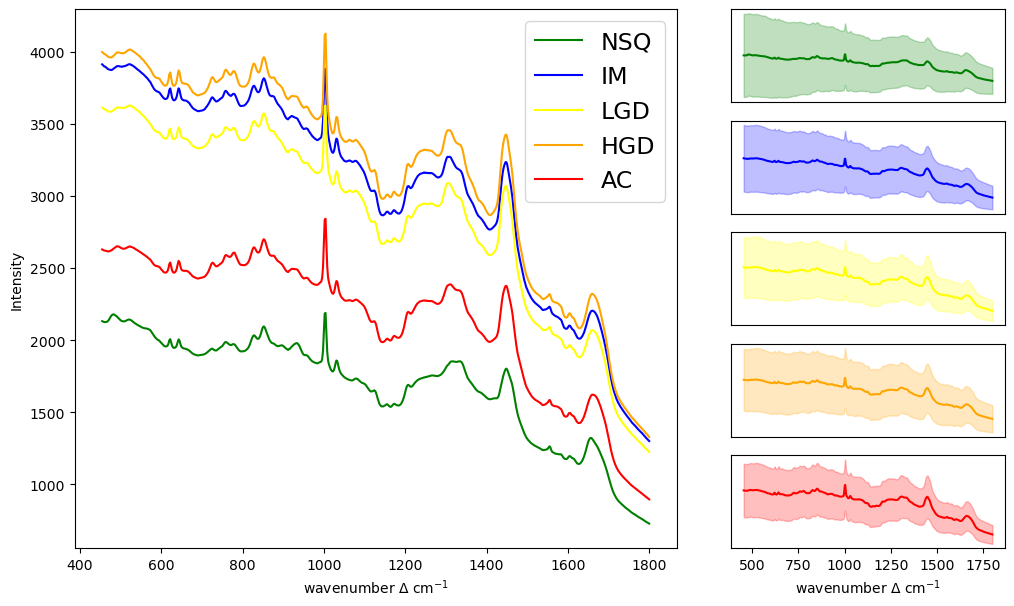

In [12]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 7))
gs = GridSpec(nrows=5, ncols=3)
fig.add_subplot(gs[:, 0:2])
plt.plot(SMART_wn,  NSQ_AveSpectra, label = "NSQ", color = 'green')
plt.plot(SMART_wn,  IM_AveSpectra, label = "IM", color = 'blue')
plt.plot(SMART_wn,  LGD_AveSpectra, label = "LGD", color = 'yellow')
plt.plot(SMART_wn,  HGD_AveSpectra, label = "HGD", color = 'orange')
plt.plot(SMART_wn,  AC_AveSpectra, label = "AC", color = 'red')
plt.legend(loc = 'upper right',prop={'size': 17})
plt.ylabel ('Intensity')
plt.xlabel ( 'wavenumber $\Delta$ cm$^{-1}$')

fig.add_subplot(gs[0, 2])
plt.plot (SMART_wn,NSQ_AveSpectra, color = 'green')
plt.fill_between(SMART_wn,NSQ_AveSpectra-NSQ_STDSpectra,NSQ_AveSpectra+NSQ_STDSpectra,alpha=.25, color = 'green')
plt.xticks([])
plt.yticks([])

fig.add_subplot(gs[3, 2])
plt.plot (SMART_wn,HGD_AveSpectra, color = 'orange')
plt.fill_between(SMART_wn,HGD_AveSpectra-HGD_STDSpectra,HGD_AveSpectra+HGD_STDSpectra,alpha=.25, color = 'orange')
plt.xticks([])
plt.yticks([])

fig.add_subplot(gs[1, 2])
plt.plot (SMART_wn,IM_AveSpectra, color = 'blue')
plt.fill_between(SMART_wn,IM_AveSpectra-IM_STDSpectra,IM_AveSpectra+IM_STDSpectra,alpha=.25, color = 'blue')
plt.xticks([])
plt.yticks([])

fig.add_subplot(gs[2, 2])
plt.plot (SMART_wn,LGD_AveSpectra, color = 'yellow')
plt.fill_between(SMART_wn,LGD_AveSpectra-LGD_STDSpectra,LGD_AveSpectra+LGD_STDSpectra,alpha=.25, color = 'yellow')
plt.xticks([])
plt.yticks([])

fig.add_subplot(gs[4, 2])
plt.plot (SMART_wn,AC_AveSpectra, color = 'red')
plt.fill_between(SMART_wn,AC_AveSpectra-AC_STDSpectra,AC_AveSpectra+AC_STDSpectra,alpha=.25, color = 'red')
plt.yticks([])
plt.xlabel ( 'wavenumber $\Delta$ cm$^{-1}$')

plt.show()

In [16]:
# Mean of each centre

Centre_1_Spectra = np.zeros( [np.sum(SMART_centre == 0) , SMART_x.shape[1] ] )
Centre_2_Spectra = np.zeros( [np.sum(SMART_centre == 1) , SMART_x.shape[1] ] )
Centre_3_Spectra = np.zeros( [np.sum(SMART_centre == 2) , SMART_x.shape[1] ] )


l =0
k =0
m = 0


for i in range (0, len(np.squeeze(SMART_centre))):
    if np.squeeze(SMART_centre)[i] == 0:
        Centre_1_Spectra[l][:]= np.array(SMART_x[i])
        l += 1
    elif np.squeeze(SMART_centre)[i] == 1:
        Centre_2_Spectra[k][:] = np.array(SMART_x[i])
        k += 1
    elif np.squeeze(SMART_centre)[i] == 2:
        Centre_3_Spectra[m][:] = np.array(SMART_x[i])
        m += 1

        
Centre_1_AveSpectra = np.mean(Centre_1_Spectra, axis=0)
Centre_2_AveSpectra = np.mean(Centre_2_Spectra, axis=0) 
Centre_3_AveSpectra = np.mean(Centre_3_Spectra, axis=0) 

Centre_1_STDSpectra = np.std(Centre_1_Spectra, axis=0)
Centre_2_STDSpectra = np.std(Centre_2_Spectra, axis=0) 
Centre_3_STDSpectra = np.std(Centre_3_Spectra, axis=0) 

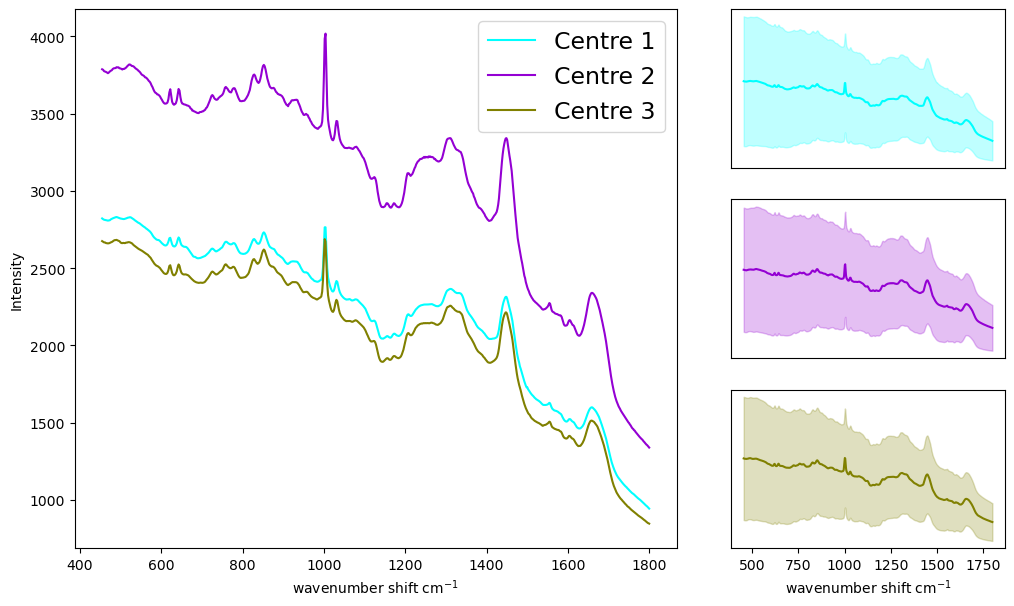

In [18]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 7))
gs = GridSpec(nrows=3, ncols=3)
fig.add_subplot(gs[:, 0:2])
plt.plot(SMART_wn,  Centre_1_AveSpectra, label = "Centre 1", color = "aqua")
plt.plot(SMART_wn,  Centre_2_AveSpectra, label = "Centre 2", color = 'darkviolet')
plt.plot(SMART_wn,  Centre_3_AveSpectra, label = "Centre 3", color = 'olive')
plt.legend(loc = 'upper right',prop={'size': 17})
plt.ylabel ('Intensity')
plt.xlabel ( 'wavenumber shift cm$^{-1}$')

fig.add_subplot(gs[0, 2])
plt.plot (SMART_wn,Centre_1_AveSpectra, color = "aqua")
plt.fill_between(SMART_wn,Centre_1_AveSpectra-Centre_1_STDSpectra,Centre_1_AveSpectra+Centre_1_STDSpectra,alpha=.25, color = 'aqua')
plt.xticks([])
plt.yticks([])

fig.add_subplot(gs[1, 2])
plt.plot (SMART_wn,Centre_2_AveSpectra, color = 'darkviolet')
plt.fill_between(SMART_wn,Centre_2_AveSpectra-Centre_2_STDSpectra,Centre_2_AveSpectra+Centre_2_STDSpectra,alpha=.25, color = 'darkviolet')
plt.xticks([])
plt.yticks([])

fig.add_subplot(gs[2, 2])
plt.plot (SMART_wn,Centre_3_AveSpectra, color = 'olive')
plt.fill_between(SMART_wn,Centre_3_AveSpectra-Centre_3_STDSpectra,Centre_3_AveSpectra+Centre_3_STDSpectra,alpha=.25, color = 'olive')
plt.yticks([])
plt.xlabel ( 'wavenumber shift cm$^{-1}$')
plt.show()